In [1]:
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

2024-03-07 10:36:12.542297: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv("../data/cleaned_data.csv")
data.head()

,id,text,target
0,48,wholesale markets ablaze,1
1,49,we always try to bring the heavy,0
2,50,breaking news nigeria flag set ablaze in aba,1
3,52,crying out for more set me ablaze,0
4,53,on plus side look at the sky last night it was...,0


Text(0, 0.5, 'Total samples')

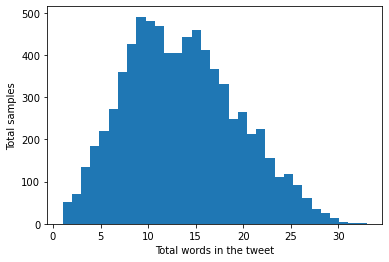

In [11]:
seq_len = [len(x.split()) for x in data.text.tolist()]
plt.hist(seq_len, bins=33);
plt.xlabel("Total words in the tweet")
plt.ylabel("Total samples")

In [13]:
X = data.text
y = data.target

## Basic model

In [42]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences, to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Optimizer, Adam

In [14]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [34]:
X_data = tokenizer.texts_to_sequences(X)
X_data = pad_sequences(X_data, padding='post')

In [36]:
y_data = to_categorical(y)

In [39]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=41)

In [71]:
X_train = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))
X_val = (X_val - np.min(X_val))/(np.max(X_val) - np.min(X_val))

In [154]:
simple_model = Sequential()
simple_model.add(Dense(2048, activation='relu', input_shape=(X_train.shape[1],)))
simple_model.add(Dropout(0.3))
simple_model.add(Dense(2048, activation='relu'))
simple_model.add(Dense(64, activation='relu'))
simple_model.add(Dense(2, activation='softmax'))

In [155]:
adam = Adam(learning_rate=0.01)
simple_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['acc'])

In [156]:
simple_model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 2048)              69632     
                                                                 
 dropout_18 (Dropout)        (None, 2048)              0         
                                                                 
 dense_73 (Dense)            (None, 2048)              4196352   
                                                                 
 dense_74 (Dense)            (None, 64)                131136    
                                                                 
 dense_75 (Dense)            (None, 2)                 130       
                                                                 
Total params: 4397250 (16.77 MB)
Trainable params: 4397250 (16.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [157]:
history = simple_model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val), verbose=False)

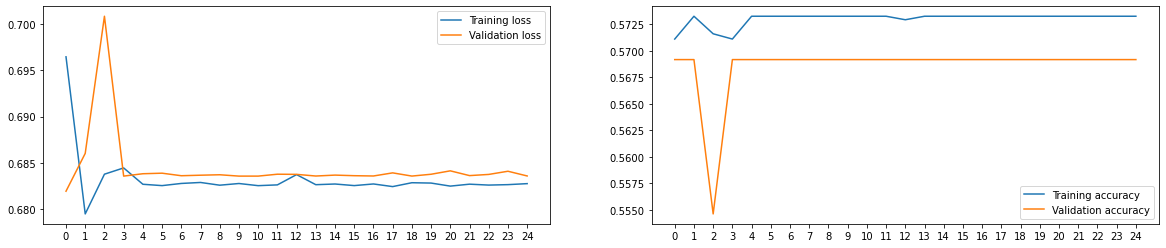

In [158]:
plt.figure(figsize = (20,4))

plt.subplot(121)
plt.xticks(np.arange(0, len(history.history['loss'])));
plt.plot(history.history['loss'], label="Training loss");
plt.plot(history.history['val_loss'], label="Validation loss");
plt.legend();

plt.subplot(122)
plt.xticks(np.arange(0, len(history.history['loss'])));
plt.plot(history.history['acc'], label="Training accuracy");
plt.plot(history.history['val_acc'], label="Validation accuracy")
plt.legend();

## Embdeddings

In [ ]:
EMBEDDING_DIMENSION = 10
embedding_model = Sequential()
embedding_model.add(Embedding(EMBEDDING_DIMENSION, ))